# Feature-preserving smoothing

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

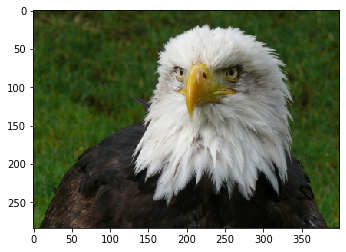

In [2]:
clean = cv2.imread('data/3-eagle.jpg')
clean = cv2.cvtColor(clean, cv2.COLOR_BGR2RGB)
plt.imshow(clean)

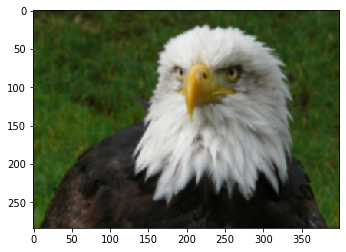

In [3]:
gaussian = cv2.GaussianBlur(clean,(5,5),0)
plt.imshow(gaussian)

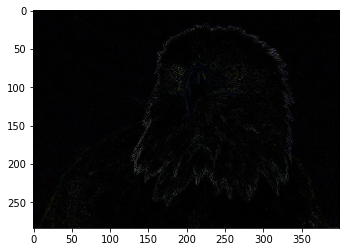

In [4]:
difference = cv2.absdiff(gaussian, clean)
plt.imshow(difference)

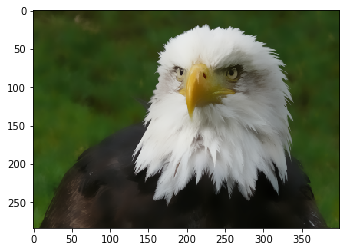

In [5]:
bilateral = cv2.bilateralFilter(clean, d=5*6, sigmaColor=50, sigmaSpace=5)
plt.imshow(bilateral)

In [6]:
def calculateBilateralAndPlot(d, sc, ss, img):
    bilateral = cv2.bilateralFilter(img, d, sc, ss)
    difference = cv2.subtract(bilateral, img)
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(bilateral)
    ax[0].set_title("Bilateral")
    ax[1].imshow(difference)
    ax[1].set_title("Difference")
    plt.suptitle("(d, sigmaColor, sigmaSpace) = (" + str(d) + ", " 
                 + str(sc) + ", " + str(ss) + ")")

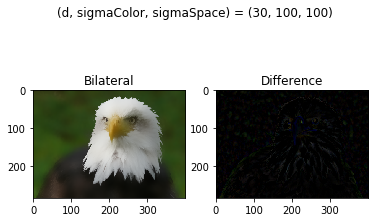

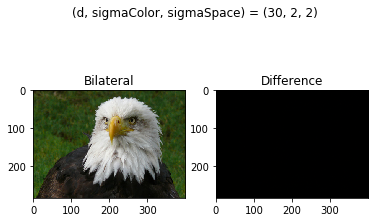

In [14]:
calculateBilateralAndPlot(30, 100, 100, clean)
calculateBilateralAndPlot(30, 2, 2, clean)

In [15]:
def iterateBilateral(img, n_it):
    blured = cv2.bilateralFilter(img, 30, 120, 50)
    for i in range(n_it - 1):
        blured = cv2.bilateralFilter(blured, 30, 120, 50)
    return blured

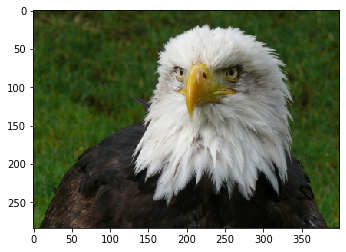

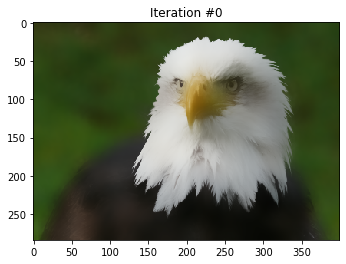

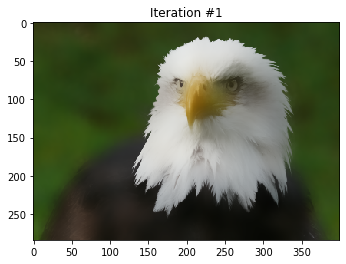

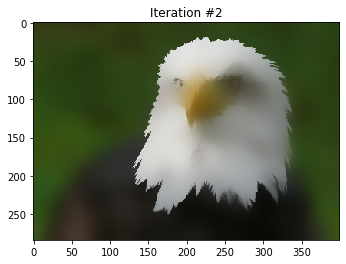

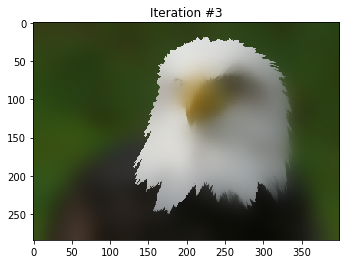

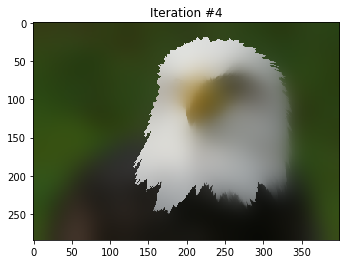

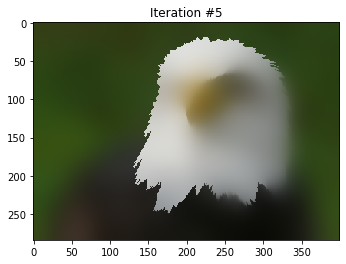

In [16]:
plt.imshow(clean)
for i in range(6):
    plt.figure()
    blured = iterateBilateral(clean, i)
    plt.imshow(blured)
    plt.title("Iteration #" + str(i))

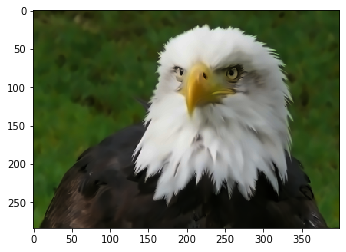

In [10]:
denoised = cv2.fastNlMeansDenoisingColored(clean, h=10, hColor=20,
                                          templateWindowSize=5,
                                          searchWindowSize=10)
plt.imshow(denoised)

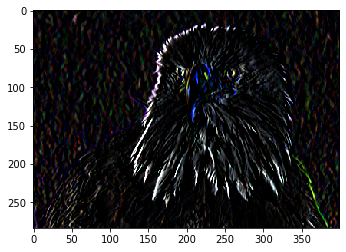

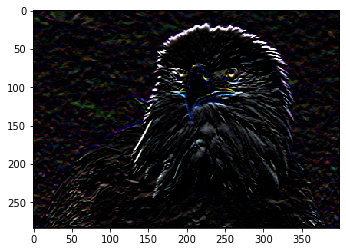

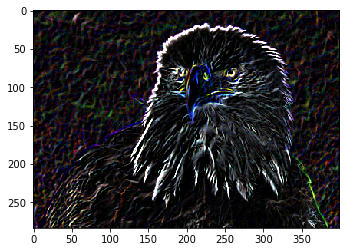

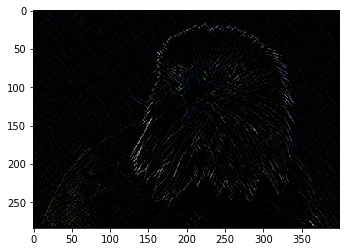

In [25]:
plt.figure()
sobelx = cv2.Sobel(clean, cv2.CV_8U, 1, 0)
plt.imshow(sobelx)
plt.figure()
sobely = cv2.Sobel(clean, cv2.CV_8U, 0, 1)
plt.imshow(sobely)
plt.figure()
sobelxy = cv2.add(sobelx, sobely)
plt.imshow(sobelxy)
plt.figure()
sobel = cv2.Sobel(clean, cv2.CV_8U, 1, 1)
plt.imshow(sobel)

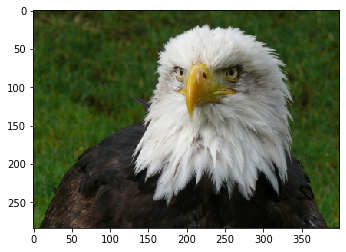

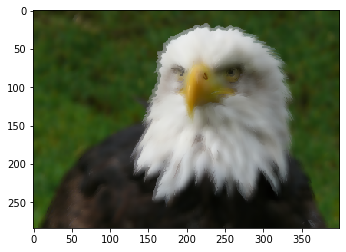

In [28]:
joint = cv2.ximgproc.jointBilateralFilter(sobelxy, clean, 10, 120, 50)
plt.figure()
plt.imshow(clean)
plt.figure()
plt.imshow(joint)

In [62]:
def abstraction(img):
    filtered = cv2.bilateralFilter(img, 20, 100, 100)
    sobelx = cv2.Sobel(img, cv2.CV_8U, 1, 0)
    sobely = cv2.Sobel(img, cv2.CV_8U, 0, 1)
    edges = cv2.add(sobelx, sobely)
    gray = cv2.cvtColor(edges, cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)
    mask_inv = cv2.bitwise_not(mask)
    return cv2.bitwise_and(filtered, filtered, mask = mask_inv)

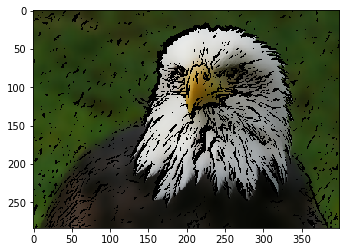

In [63]:
res = abstraction(clean)
plt.figure()
plt.imshow(res)

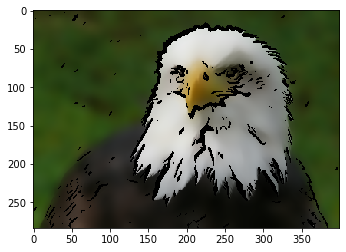

In [64]:
res = abstraction(denoised)
plt.imshow(res)

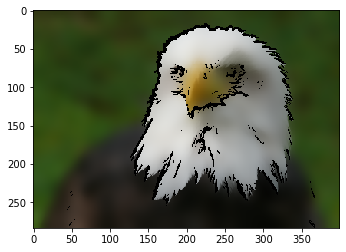

In [65]:
bilateral = cv2.bilateralFilter(clean, 20, 100, 100)
res = abstraction(bilateral)
plt.imshow(res)